# Gradient Boosting - Detailed Explanation

## 1. What is Gradient Boosting?
Gradient Boosting is an ensemble method that builds models sequentially.
Each new model tries to correct the mistakes of the previous ones.
Unlike Random Forest (parallel trees), Gradient Boosting adds trees one at a time and optimizes using gradients of the loss function.

---

## 2. How Gradient Boosting Works
1. Start with a weak model (e.g., shallow decision tree).
2. Compute errors (residuals) between predictions and actual values.
3. Fit a new tree to predict the residuals.
4. Update predictions with a learning rate to control contribution.
5. Repeat for many iterations until the model converges.

---

## 3. Key Hyperparameters
- **n_estimators**: Number of trees (iterations).
- **learning_rate**: Step size (lower → more robust, needs more trees).
- **max_depth**: Depth of each individual tree.
- **subsample**: Fraction of data used to fit each tree.
- **min_samples_split / min_samples_leaf**: Controls tree complexity.

---

## 4. Advantages
- High accuracy.
- Can model complex nonlinear relationships.
- Provides feature importance.
- Often outperforms Random Forest in competitions.

---

## 5. Disadvantages
- Training can be slow for large datasets.
- Sensitive to hyperparameters (requires tuning).
- Can overfit if `learning_rate` is too high or too many trees are added.

---

## 6. Real-World Applications
- Customer churn prediction
- Credit risk scoring
- Sales forecasting
- Fraud detection


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [2]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



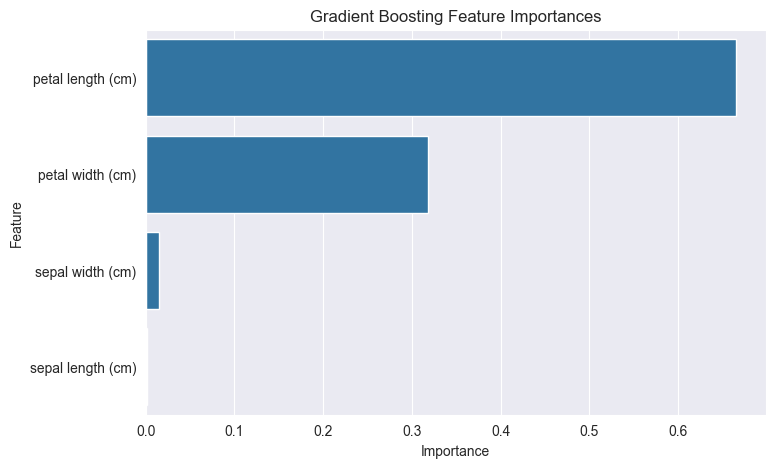

In [3]:
importances = gb.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Gradient Boosting Feature Importances')
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, best_pred))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 1.0}
Tuned Model Accuracy: 1.0
